In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wholesome_customers_data.csv')

In [4]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

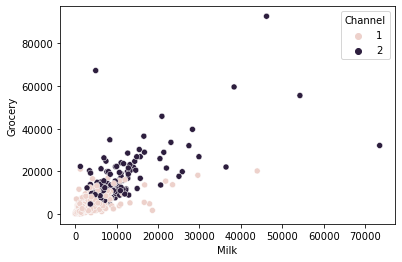

In [6]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

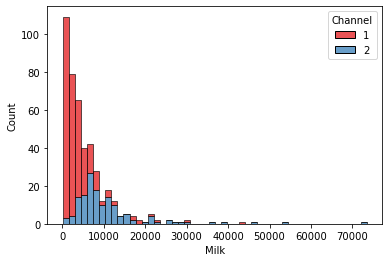

In [9]:
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set1', multiple='stack')

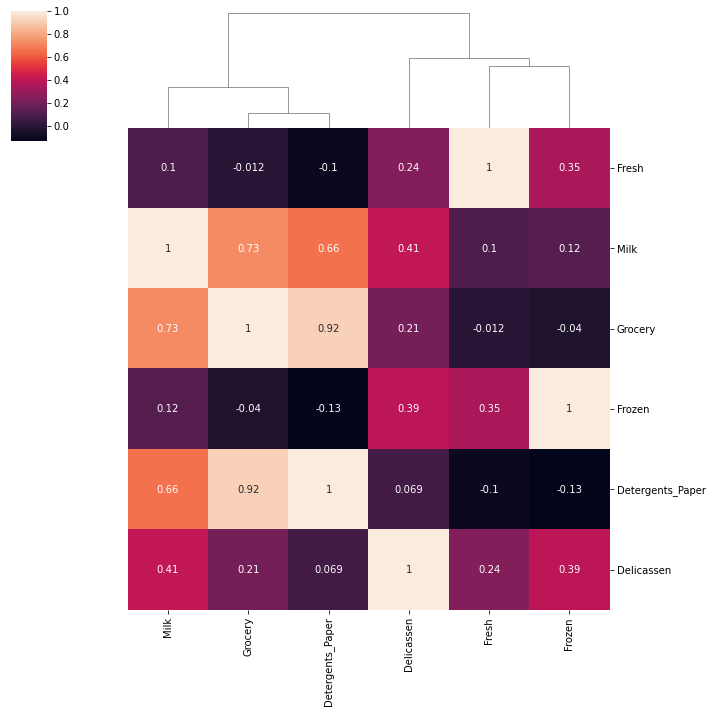

In [11]:
sns.clustermap(df.drop(['Region', 'Channel'], axis=1).corr(), annot=True, row_cluster=False)

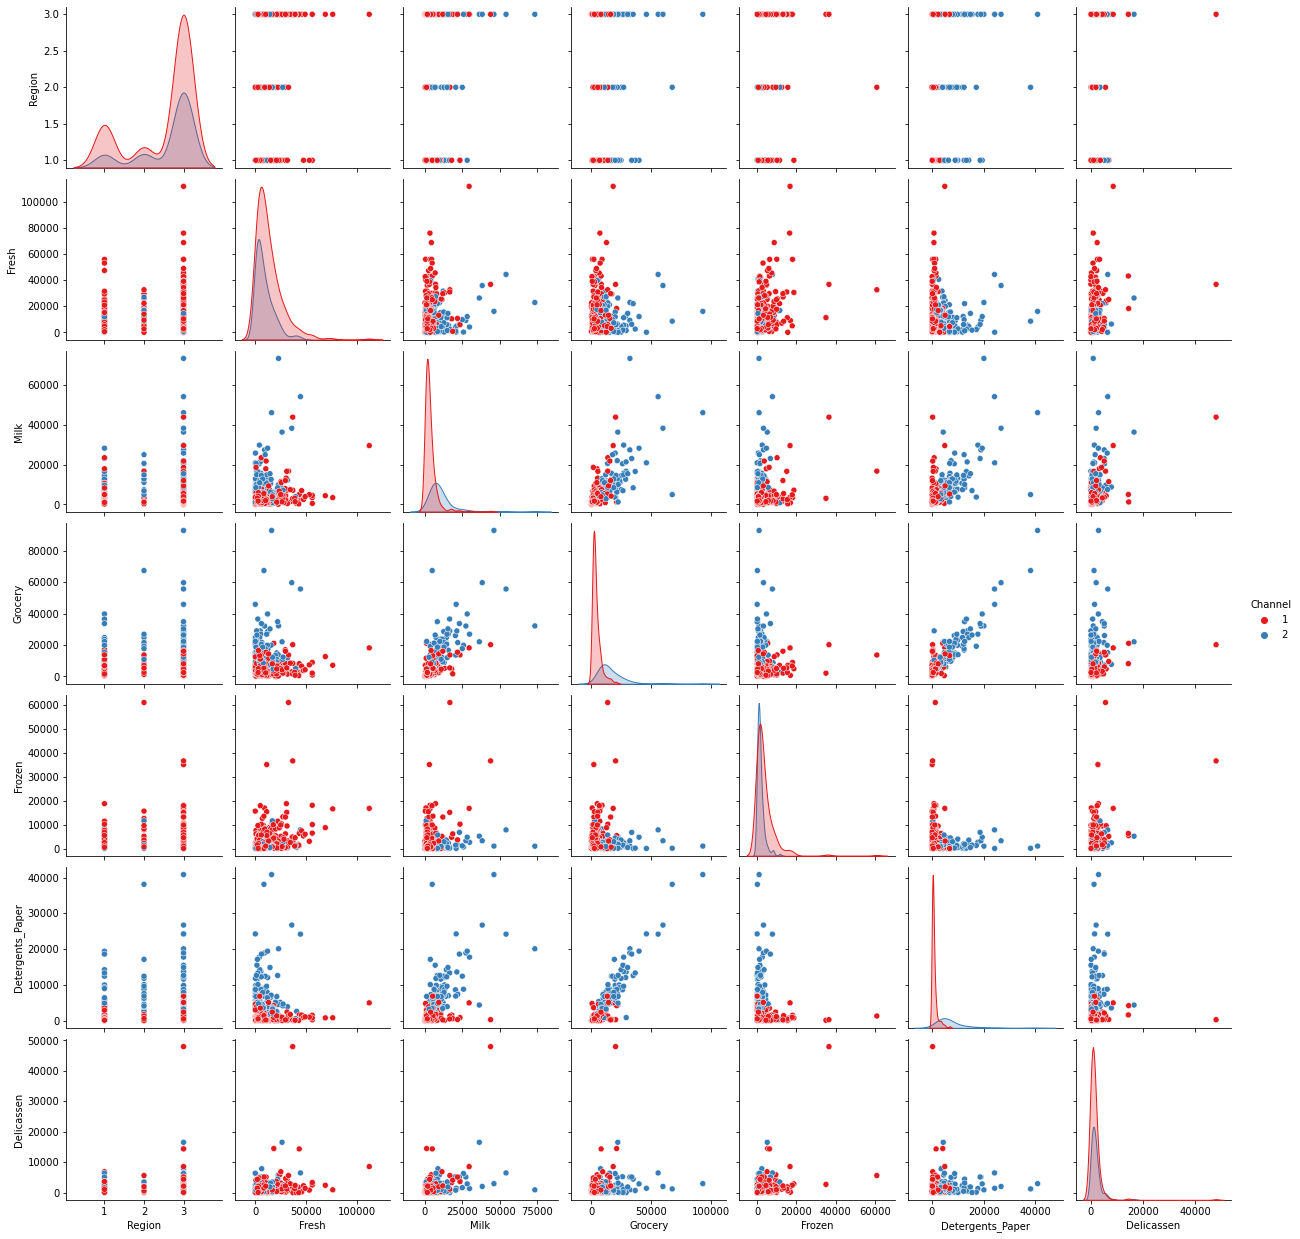

In [13]:
sns.pairplot(df, hue='Channel', palette='Set1')

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaled_X = scaler.fit_transform(df)

In [18]:
from sklearn.cluster import DBSCAN

In [21]:
outlier_percent = []
for eps in np.linspace(0.001, 3, 50):

    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)

    perc_outliers = 100*np.sum(dbscan.labels_ == -1)/ len(dbscan.labels_)

    outlier_percent.append(perc_outliers)


<AxesSubplot:>

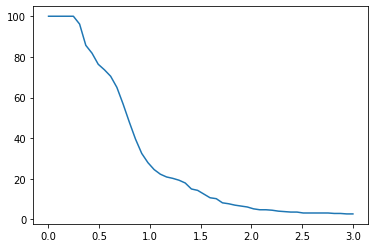

In [22]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outlier_percent)

In [23]:
dbscan = DBSCAN(eps=2, min_samples=scaled_X.shape[1])

In [24]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

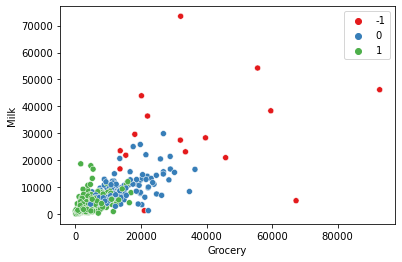

In [26]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan.labels_, palette='Set1')

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

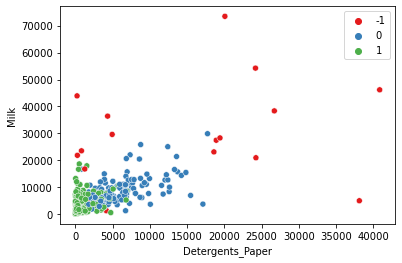

In [27]:
sns.scatterplot(data=df, x='Detergents_Paper', y='Milk', hue=dbscan.labels_, palette='Set1')

In [28]:
df['Labels'] = dbscan.labels_

In [31]:
cats = df.drop(['Channel', 'Region'], axis=1)
cat_means = cats.groupby('Labels').mean()

<AxesSubplot:ylabel='Labels'>

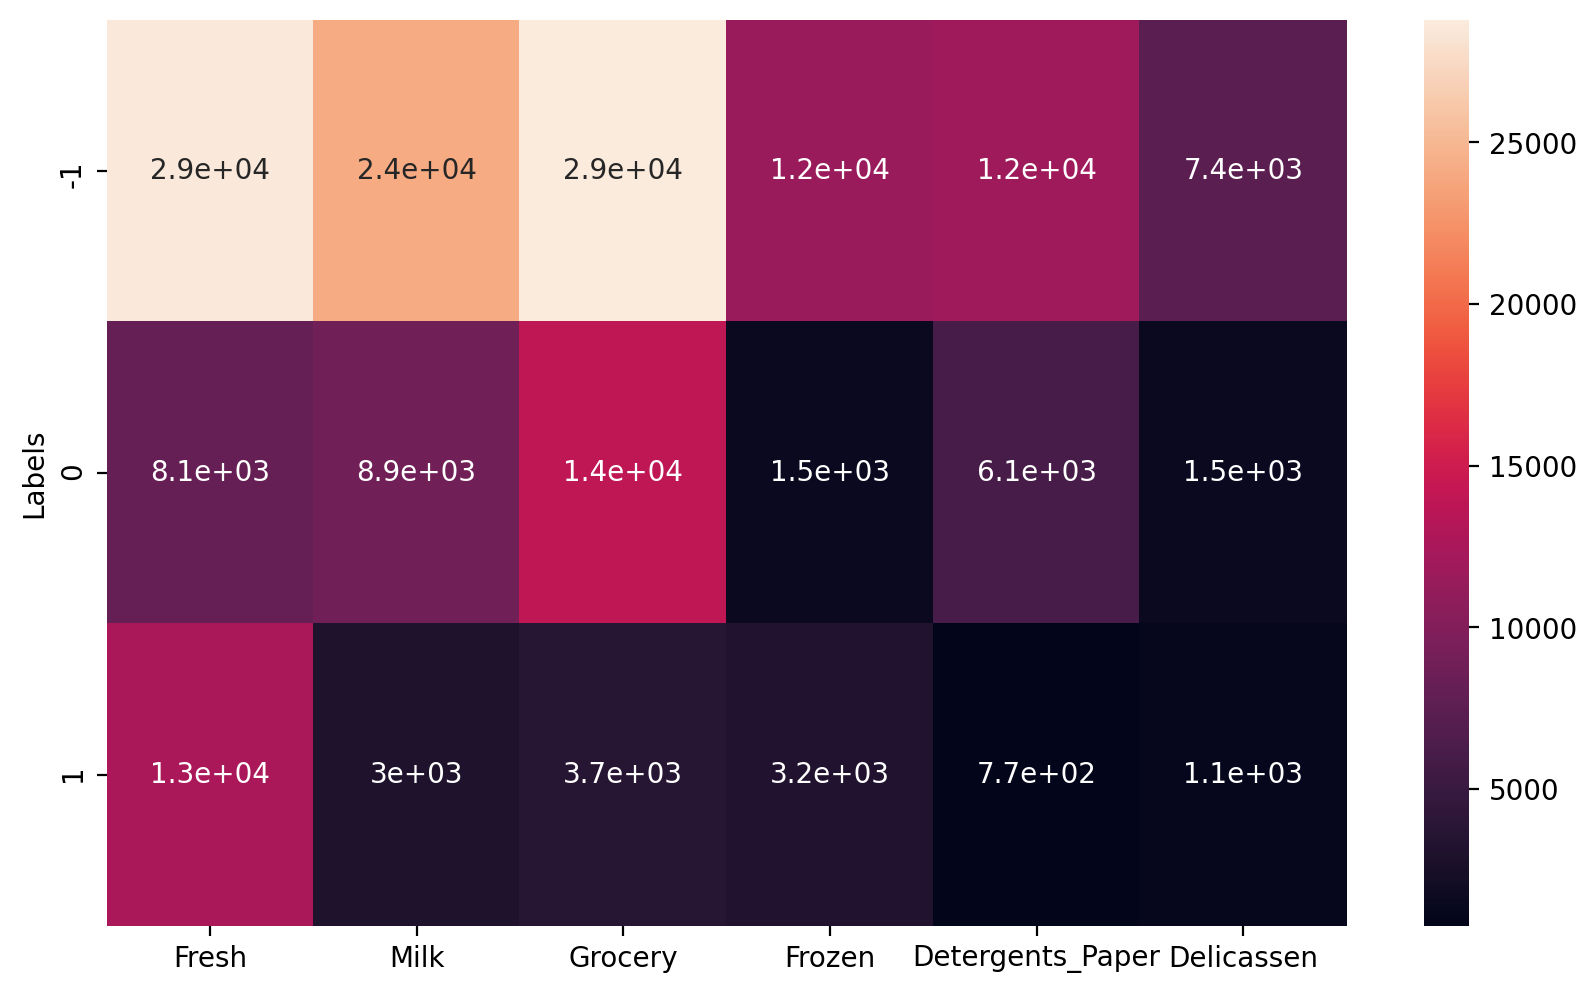

In [33]:
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(cat_means, annot=True)